In [1]:
# Name: N Karthick
# Roll No: 24BAD055
# ML Lab Experiment 3 - Scenario 2 (Polynomial Regression)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#Load the dataset
url = "ml_exp3_2_dataset/auto-mpg.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
#Dataset values
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    str    
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    str    
dtypes: float64(3), int64(4), str(2)
memory usage: 28.1 KB


In [4]:
#Checking missing values
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
# Replace '?' with NaN
df["horsepower"] = df["horsepower"].replace("?", np.nan)

# Convert horsepower to numeric
df["horsepower"] = pd.to_numeric(df["horsepower"])

# Drop missing values
df = df.dropna()

print(df["horsepower"].dtype)
df.head()



float64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [10]:
#Selecting features and Target
X = df[["horsepower"]]   
y = df["mpg"]            

print("X Shape:", X.shape)
print("y Shape:", y.shape)

X.head()


X Shape: (392, 1)
y Shape: (392,)


,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0


In [11]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)


Training Data: (313, 1)
Testing Data: (79, 1)


In [12]:
#Polynomial regression degree 2
poly2 = PolynomialFeatures(degree=2)

X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train_poly2)
X_test_scaled2 = scaler2.transform(X_test_poly2)

model2 = LinearRegression()
model2.fit(X_train_scaled2, y_train)

y_pred2 = model2.predict(X_test_scaled2)

mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)

print("Degree 2 Polynomial Regression Results:")
print("MSE:", mse2)
print("RMSE:", rmse2)
print("R2 Score:", r2_2)


Degree 2 Polynomial Regression Results:
MSE: 18.416967796017794
RMSE: 4.291499481069268
R2 Score: 0.6391701147013311


In [13]:
#Polynomial regression degree 3 
poly3 = PolynomialFeatures(degree=3)

X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

scaler3 = StandardScaler()
X_train_scaled3 = scaler3.fit_transform(X_train_poly3)
X_test_scaled3 = scaler3.transform(X_test_poly3)

model3 = LinearRegression()
model3.fit(X_train_scaled3, y_train)

y_pred3 = model3.predict(X_test_scaled3)

mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_test, y_pred3)

print("Degree 3 Polynomial Regression Results:")
print("MSE:", mse3)
print("RMSE:", rmse3)
print("R2 Score:", r2_3)


Degree 3 Polynomial Regression Results:
MSE: 18.460267222224626
RMSE: 4.296541309265469
R2 Score: 0.6383217814053861


In [14]:
#Polynomial regression degree 4 
poly4 = PolynomialFeatures(degree=4)

X_train_poly4 = poly4.fit_transform(X_train)
X_test_poly4 = poly4.transform(X_test)

scaler4 = StandardScaler()
X_train_scaled4 = scaler4.fit_transform(X_train_poly4)
X_test_scaled4 = scaler4.transform(X_test_poly4)

model4 = LinearRegression()
model4.fit(X_train_scaled4, y_train)

y_pred4 = model4.predict(X_test_scaled4)

mse4 = mean_squared_error(y_test, y_pred4)
rmse4 = np.sqrt(mse4)
r2_4 = r2_score(y_test, y_pred4)

print("Degree 4 Polynomial Regression Results:")
print("MSE:", mse4)
print("RMSE:", rmse4)
print("R2 Score:", r2_4)


Degree 4 Polynomial Regression Results:
MSE: 18.268226874853188
RMSE: 4.274134634619409
R2 Score: 0.6420842844016577


In [15]:
#Compare model performance table
results = pd.DataFrame({
    "Degree": [2, 3, 4],
    "MSE": [mse2, mse3, mse4],
    "RMSE": [rmse2, rmse3, rmse4],
    "R2 Score": [r2_2, r2_3, r2_4]
})

results


,Degree,MSE,RMSE,R2 Score
0,2,18.416968,4.291499,0.639170
1,3,18.460267,4.296541,0.638322
2,4,18.268227,4.274135,0.642084


c:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


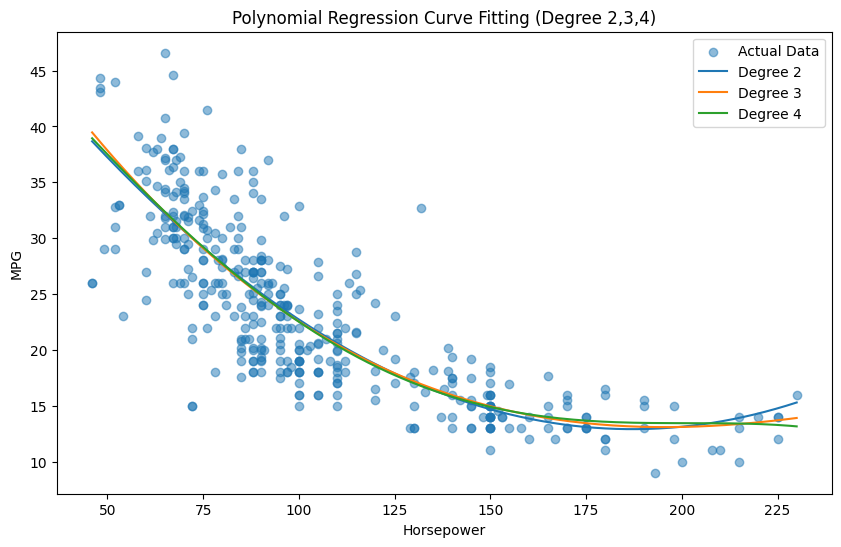

In [ ]:
#Polynomial curve plot for degree 2,3,4
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1,1)

plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.5, label="Actual Data")

X_range_poly2 = poly2.transform(X_range)
X_range_scaled2 = scaler2.transform(X_range_poly2)
y_curve2 = model2.predict(X_range_scaled2)
plt.plot(X_range, y_curve2, label="Degree 2")

X_range_poly3 = poly3.transform(X_range)
X_range_scaled3 = scaler3.transform(X_range_poly3)
y_curve3 = model3.predict(X_range_scaled3)
plt.plot(X_range, y_curve3, label="Degree 3")

X_range_poly4 = poly4.transform(X_range)
X_range_scaled4 = scaler4.transform(X_range_poly4)
y_curve4 = model4.predict(X_range_scaled4)
plt.plot(X_range, y_curve4, label="Degree 4")

plt.title("Polynomial Regression Curve Fitting (Degree 2,3,4)")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.show()


In [17]:
#Ridge overfitting regression degreee 4 
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train_scaled4, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled4)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression (Degree 4) Results:")
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)
print("R2 Score:", r2_ridge)


Ridge Regression (Degree 4) Results:
MSE: 18.304501827037402
RMSE: 4.278376073586496
R2 Score: 0.641373576375189


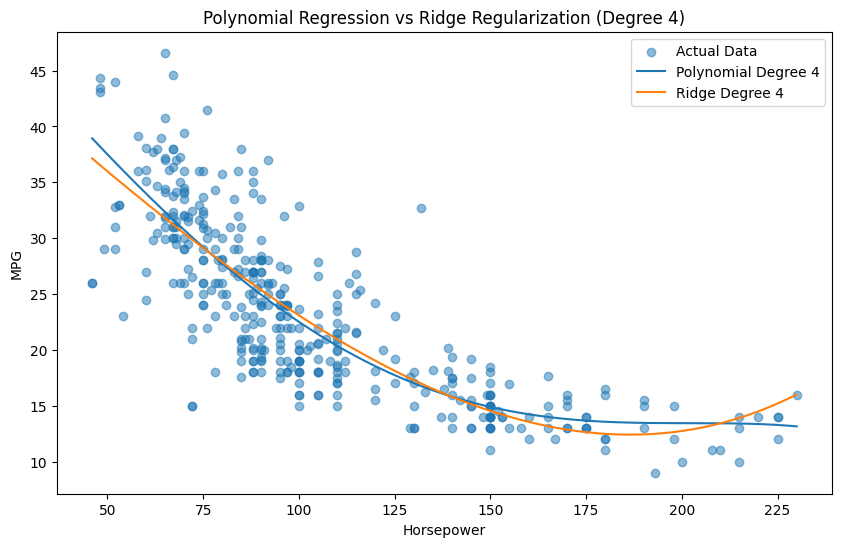

In [18]:
#Ridge curve plot
y_curve_ridge = ridge_model.predict(X_range_scaled4)

plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.5, label="Actual Data")
plt.plot(X_range, y_curve4, label="Polynomial Degree 4")
plt.plot(X_range, y_curve_ridge, label="Ridge Degree 4")

plt.title("Polynomial Regression vs Ridge Regularization (Degree 4)")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.show()


In [ ]:
#Overfitting and underfitting
train_errors = []
test_errors = []

train_pred2 = model2.predict(X_train_scaled2)
test_pred2 = model2.predict(X_test_scaled2)

train_errors.append(mean_squared_error(y_train, train_pred2))
test_errors.append(mean_squared_error(y_test, test_pred2))

train_pred3 = model3.predict(X_train_scaled3)
test_pred3 = model3.predict(X_test_scaled3)

train_errors.append(mean_squared_error(y_train, train_pred3))
test_errors.append(mean_squared_error(y_test, test_pred3))

train_pred4 = model4.predict(X_train_scaled4)
test_pred4 = model4.predict(X_test_scaled4)

train_errors.append(mean_squared_error(y_train, train_pred4))
test_errors.append(mean_squared_error(y_test, test_pred4))

error_df = pd.DataFrame({
    "Degree": [2, 3, 4],
    "Train MSE": train_errors,
    "Test MSE": test_errors
})

error_df


,Degree,Train MSE,Test MSE
0,2,19.204614,18.416968
1,3,19.143788,18.460267
2,4,19.126191,18.268227


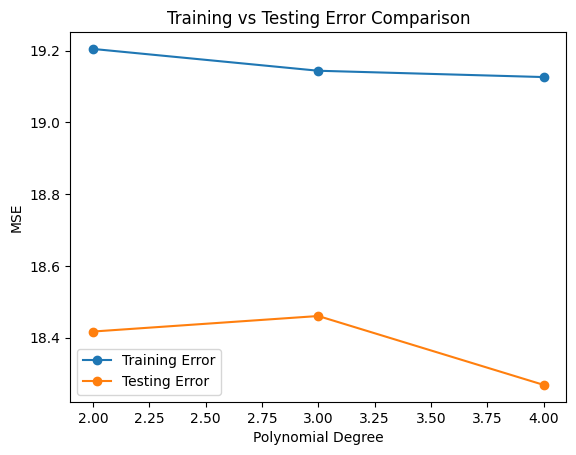

In [20]:
#plot training vs testing error
plt.figure()
plt.plot(error_df["Degree"], error_df["Train MSE"], marker="o", label="Training Error")
plt.plot(error_df["Degree"], error_df["Test MSE"], marker="o", label="Testing Error")

plt.title("Training vs Testing Error Comparison")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.legend()
plt.show()
